In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

import os

In [38]:
from pathlib import Path

# Configurable parts
SYMBOL = "USDJPY"
SAMPLE_TYPE = "time"
MINUTES = 1
DOLLAR_THRESHOLD = "115009542m"
EVENT_NAME = "CUSUM"
EVENT_THRESHOLD = 2.52e-04

START_DATE = "20210101"
END_DATE = "20241231"

# Build base name
if SAMPLE_TYPE == "dollar":
    RESAMPLED_NAME = f"{SYMBOL}-{DOLLAR_THRESHOLD}-dollar-{START_DATE}-{END_DATE}"
else:
    RESAMPLED_NAME = f"{SYMBOL}-{MINUTES}m-{START_DATE}-{END_DATE}"

# Base directories
BASE_DIR = Path("../data")
RESAMPLED_DIR = BASE_DIR / "resampled"
PROCESSED_DIR = BASE_DIR / "processed"
NORMALIZED_DIR = BASE_DIR / "normalized"
SCALER_DIR = BASE_DIR / "scalers"
EVENTS_DIR = BASE_DIR / "events"

# Final paths
PROCESSED_FILE_PATH = PROCESSED_DIR / f"{RESAMPLED_NAME}-processed.pkl"
NORMALIZED_FILE_PATH = NORMALIZED_DIR / f"{RESAMPLED_NAME}-normalized.pkl"
STD_SCALER_PATH = SCALER_DIR / f"{RESAMPLED_NAME}_standard_scaler.pkl"
MINMAX_SCALER_PATH = SCALER_DIR / f"{RESAMPLED_NAME}_minmax_scaler.pkl"
EVENT_FILE_PATH = EVENTS_DIR / f"{RESAMPLED_NAME}_{EVENT_NAME}_{EVENT_THRESHOLD:.2e}.pkl"

In [45]:
df = pd.read_pickle(NORMALIZED_FILE_PATH)

In [46]:
df.columns.to_list()

['open',
 'high',
 'low',
 'close',
 'volume',
 'spread',
 'close_delta',
 'close_return',
 'close_log_return',
 'ret_mean_5',
 'ret_mean_10',
 'ret_mean_15',
 'ret_mean_20',
 'log_volume',
 'ema5',
 'ema5_slope',
 'ema20',
 'ema20_slope',
 'ema50',
 'ema50_slope',
 'ema100',
 'ema100_slope',
 'atr14',
 'atr25',
 'atr50',
 'log_atr14',
 'atr14_percent',
 'atr14_adjusted_return',
 'log_atr25',
 'atr25_percent',
 'atr25_adjusted_return',
 'log_atr50',
 'atr50_percent',
 'atr50_adjusted_return',
 'adx14',
 'plus_di14',
 'minus_di14',
 'bb_upper',
 'bb_lower',
 'bb_mavg',
 'bb_width',
 'bb_position',
 'donchian_upper',
 'donchian_lower',
 'donchian_mid',
 'donchian_width',
 'stoch_k',
 'stoch_d',
 'rsi14',
 'rsi14_slope',
 'rsi25',
 'rsi25_slope',
 'rsi50',
 'rsi50_slope',
 'macd',
 'macd_signal',
 'macd_diff',
 'unix_time',
 'hour',
 'dow',
 'dom',
 'month',
 'hour_sin',
 'hour_cos',
 'dow_sin',
 'dow_cos',
 'dom_sin',
 'dom_cos',
 'month_sin',
 'month_cos']

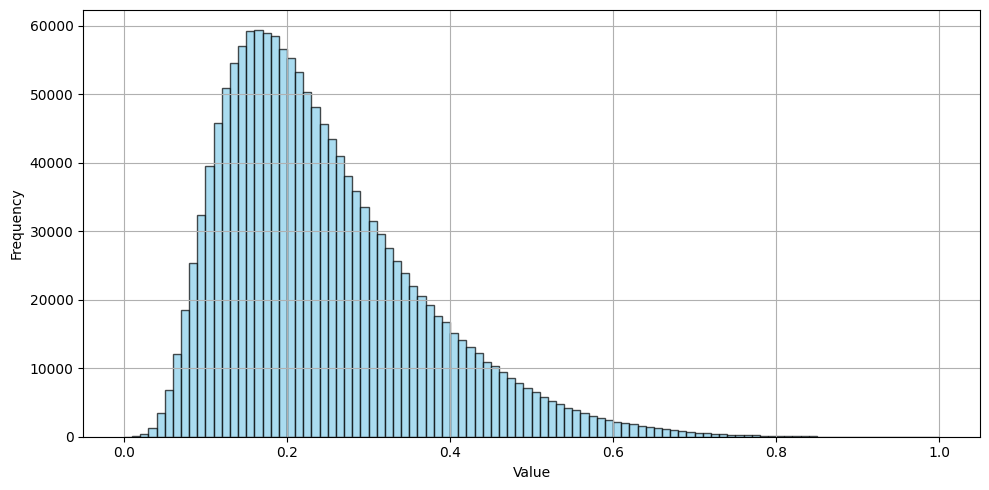

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(df['adx14'], bins=100, alpha=0.7, color='skyblue', edgecolor='black')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()